In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/craigslist-carstrucks-data/vehicles.csv


In [2]:
import numpy.random as nr
import scipy.stats as stats
import sklearn.preprocessing as skpe
import sklearn.model_selection as ms
import sklearn.metrics as sklm
import sklearn.ensemble as ensemble
import sklearn.linear_model as lm
import sklearn.tree as tree
import sklearn.linear_model as lm
import sklearn.kernel_ridge as ridge
import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import sklearn.pipeline as pipeline
from sklearn.compose import ColumnTransformer

In [3]:
path = "../input/craigslist-carstrucks-data/vehicles.csv"
data = pd.read_csv(path)
print(data.shape)
data.head()

(435849, 25)


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7119256118,https://mohave.craigslist.org/ctd/d/lake-havas...,mohave county,https://mohave.craigslist.org,3495,2012.0,jeep,patriot,like new,4 cylinders,...,NaN,NaN,NaN,silver,https://images.craigslist.org/00B0B_k2AXIJ21ok...,"THIS 2012 JEEP PATRIOT IS A 4CYL. AC, STEREO, ...",NaN,az,34.4554,-114.2690
1,7120880186,https://oregoncoast.craigslist.org/cto/d/warre...,oregon coast,https://oregoncoast.craigslist.org,13750,2014.0,bmw,328i m-sport,good,NaN,...,rwd,NaN,sedan,grey,https://images.craigslist.org/00U0U_3cLk0WGOJ8...,Selling my 2014 BMW 328i with the following be...,NaN,or,46.1837,-123.8240
2,7115048251,https://greenville.craigslist.org/cto/d/sparta...,greenville / upstate,https://greenville.craigslist.org,2300,2001.0,dodge,caravan,excellent,6 cylinders,...,NaN,NaN,NaN,NaN,https://images.craigslist.org/00k0k_t4WqYn5nDC...,"01 DODGE CARAVAN,3.3 ENGINE,AUT TRANS,199000 M...",NaN,sc,34.9352,-81.9654
3,7119250502,https://mohave.craigslist.org/cto/d/lake-havas...,mohave county,https://mohave.craigslist.org,9000,2004.0,chevrolet,colorado ls,excellent,5 cylinders,...,rwd,mid-size,pickup,red,https://images.craigslist.org/00J0J_lJEzfeVLHI...,"2004 Chevy Colorado LS, ONLY 54000 ORIGINAL MI...",NaN,az,34.4783,-114.2710
4,7120433904,https://maine.craigslist.org/ctd/d/searsport-t...,maine,https://maine.craigslist.org,0,2021.0,NaN,Honda-Nissan-Kia-Ford-Hyundai-VW,NaN,NaN,...,NaN,NaN,NaN,NaN,https://images.craigslist.org/01010_j0IW34mCsm...,CALL: 207.548.6500 TEXT: 207.407.5598 **WE FI...,NaN,me,44.4699,-68.8963


In [4]:
data.describe()

,id,price,year,odometer,county,lat,long
count,4.358490e+05,4.358490e+05,434732.000000,3.607010e+05,0.0,427614.000000,427614.000000
mean,7.115954e+09,1.349127e+05,2009.866460,9.897590e+04,NaN,38.404163,-94.961170
std,4.590854e+06,1.690857e+07,9.312503,1.134990e+05,NaN,6.036915,18.058561
min,7.096577e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-83.197100,-177.012000
25%,7.112450e+09,4.900000e+03,2007.000000,4.733300e+04,NaN,34.225700,-111.731000
50%,7.117092e+09,9.995000e+03,2012.000000,9.118800e+04,NaN,38.934800,-89.676700
75%,7.120090e+09,1.798900e+04,2015.000000,1.347360e+05,NaN,42.484500,-81.397300
max,7.121608e+09,3.647257e+09,2021.000000,1.000000e+07,NaN,79.601900,173.675000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435849 entries, 0 to 435848
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            435849 non-null  int64  
 1   url           435849 non-null  object 
 2   region        435849 non-null  object 
 3   region_url    435849 non-null  object 
 4   price         435849 non-null  int64  
 5   year          434732 non-null  float64
 6   manufacturer  415102 non-null  object 
 7   model         429650 non-null  object 
 8   condition     249043 non-null  object 
 9   cylinders     269465 non-null  object 
 10  fuel          432858 non-null  object 
 11  odometer      360701 non-null  float64
 12  title_status  434043 non-null  object 
 13  transmission  433703 non-null  object 
 14  vin           239197 non-null  object 
 15  drive         313838 non-null  object 
 16  size          139888 non-null  object 
 17  type          318741 non-null  object 
 18  pain

*There are so many columns and some of them are unnecessary; so we will drop them.*

In [6]:
drop_cols = ['id', 'url', 'region', 'region_url', 'model', 'title_status', 'vin', 'size', 'image_url', 'description', 'county', 'state', 'lat', 'long']
data = data.drop(columns=drop_cols)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435849 entries, 0 to 435848
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         435849 non-null  int64  
 1   year          434732 non-null  float64
 2   manufacturer  415102 non-null  object 
 3   condition     249043 non-null  object 
 4   cylinders     269465 non-null  object 
 5   fuel          432858 non-null  object 
 6   odometer      360701 non-null  float64
 7   transmission  433703 non-null  object 
 8   drive         313838 non-null  object 
 9   type          318741 non-null  object 
 10  paint_color   300602 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 36.6+ MB


*The data looks so cleaned now. Let's do some analysis.*

# EDA

**Numerical Features**

In [8]:
# Let's look at the target variable first
data['price'].describe()

count    4.358490e+05
mean     1.349127e+05
std      1.690857e+07
min      0.000000e+00
25%      4.900000e+03
50%      9.995000e+03
75%      1.798900e+04
max      3.647257e+09
Name: price, dtype: float64

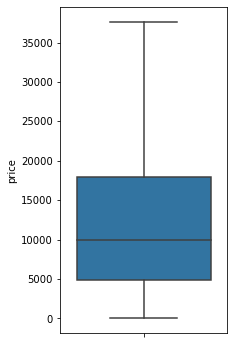

In [9]:
plt.figure(figsize=(3,6))
sns.boxplot(y='price', data=data, showfliers=False)

*Looks like the median price is around 10,000*

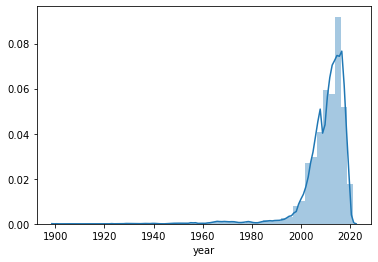

In [10]:
sns.distplot(data['year'])

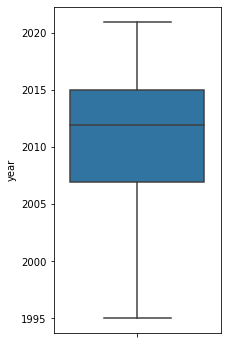

In [11]:
plt.figure(figsize=(3,6))
sns.boxplot(y='year', data=data, showfliers=False)

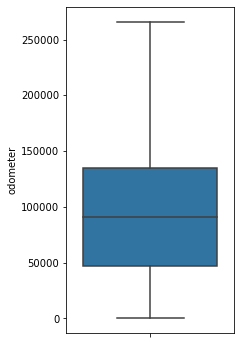

In [12]:
plt.figure(figsize=(3,6))
sns.boxplot(y='odometer', data=data, showfliers=False)

**Categorical Features**

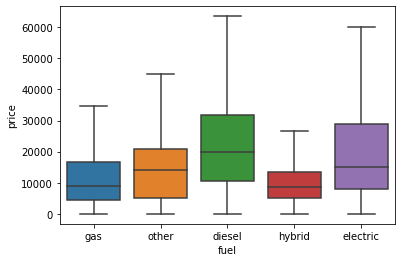

In [13]:
sns.boxplot(y='price', x='fuel', data=data, showfliers=False)

*As we can see diesel fuel-type has the highest median value out of all fuel-types showing distinctive range.*

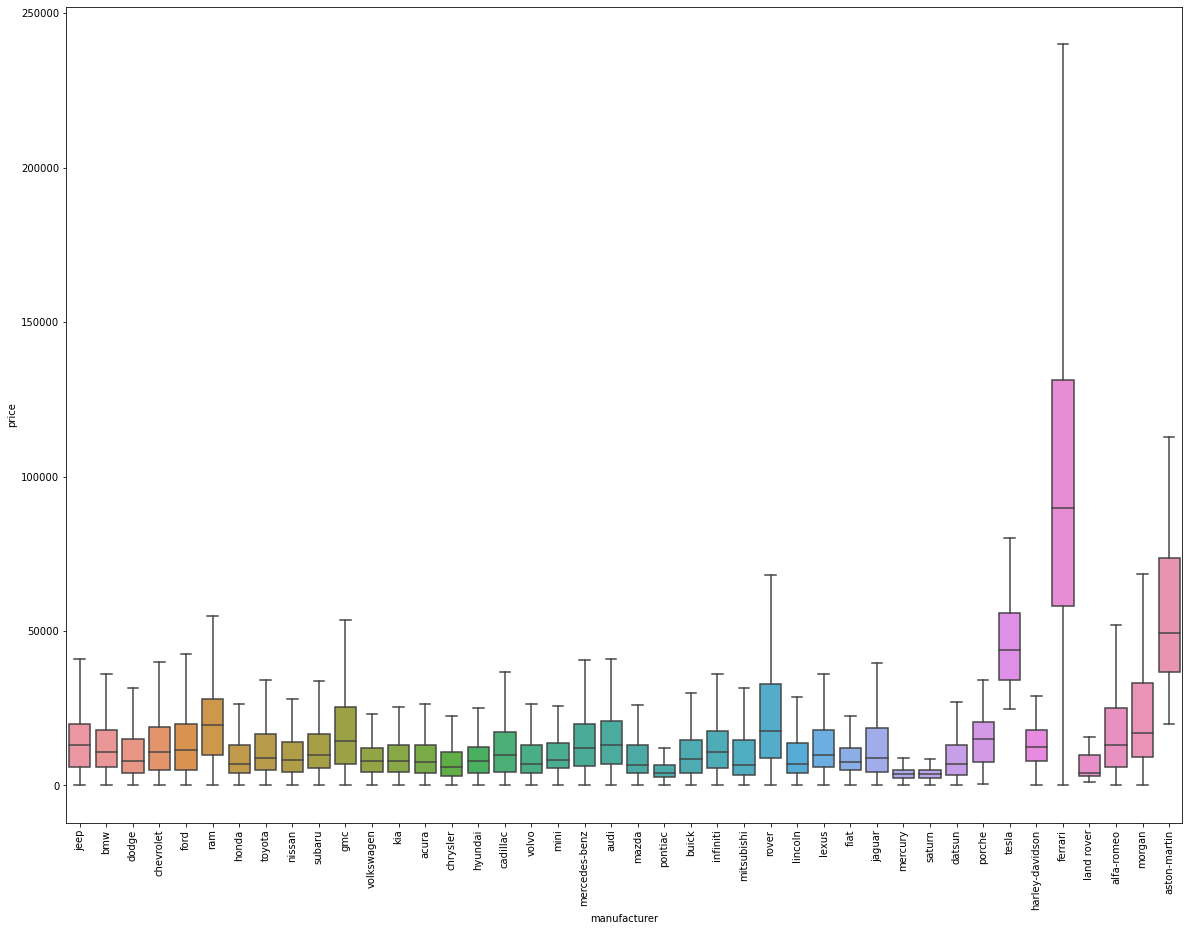

In [14]:
plt.figure(figsize=(20,15))
plt.xticks(rotation=90)
sns.boxplot(y='price', x='manufacturer', data=data, showfliers=False)

*As depicted, we can see that ferrari has a much high median price followed by aston-martin and tesla(all re well-known brands for their engine and safety features)*

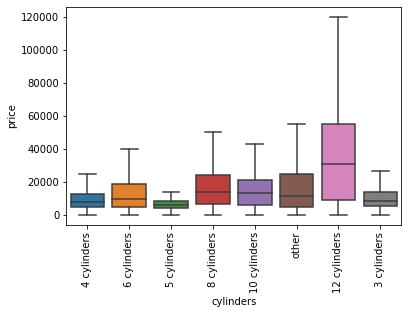

In [15]:
plt.xticks(rotation=90)
sns.boxplot(y='price', x='cylinders', data=data, showfliers=False)

*Cylinders feature is not showing much variation in its median range.*

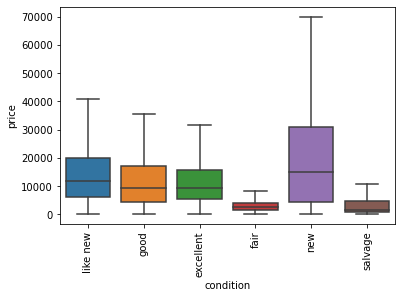

In [16]:
plt.xticks(rotation=90)
sns.boxplot(y='price', x='condition', data=data, showfliers=False)

*As we know, a customer is much likely to buy a car which has just set its tyres out of the showroom, so it's price is likely to be higher than others. No doubt here !!*

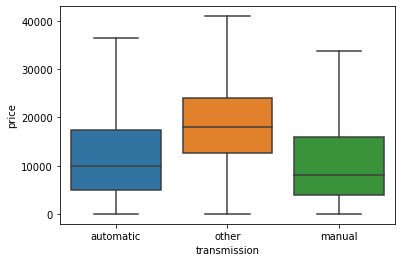

In [17]:
sns.boxplot(y='price', x='transmission', data=data, showfliers=False)

*Cars having Automatic and manual gear have almost same price(median).*

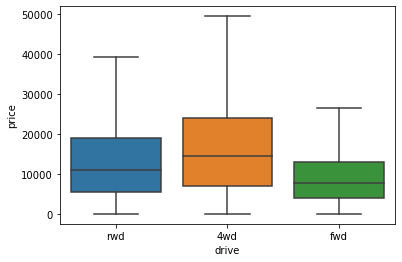

In [18]:
sns.boxplot(y='price', x='drive', data=data, showfliers=False)

*4 wheel-drive is the most preferred drive out of all drives.*

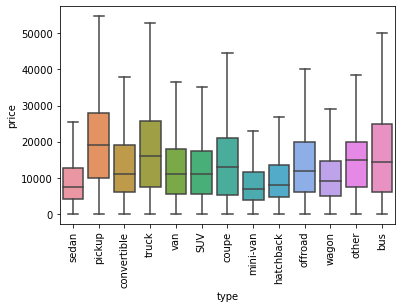

In [19]:
plt.xticks(rotation=90)
sns.boxplot(y='price', x='type', data=data, showfliers=False)

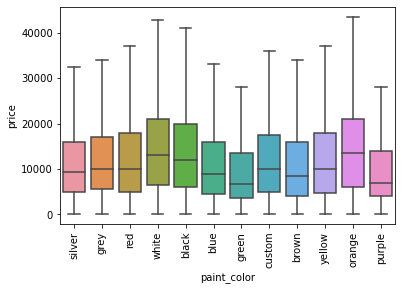

In [20]:
plt.xticks(rotation=90)
sns.boxplot(y='price', x='paint_color', data=data, showfliers=False)

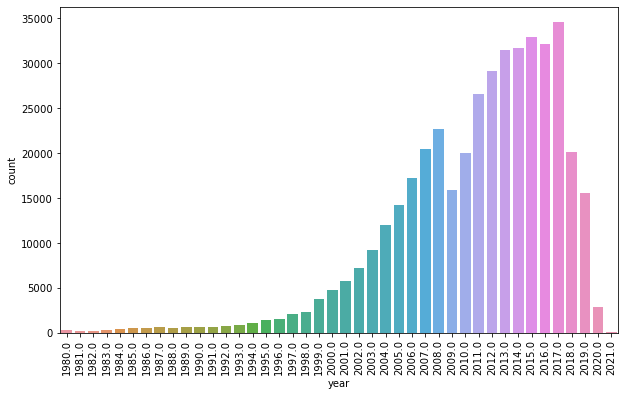

In [21]:
# Getting data afterward 1980
data = data.loc[lambda data : data['year'] >= 1980]

plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.countplot(x='year', data=data)

*Most no. of cars were manufactured in 2017.*

In [22]:
print('Top 10 car manufacturing years: ')
print(data['year'].value_counts().iloc[:10])

Top 10 car manufacturing years: 
2017.0    34592
2015.0    32918
2016.0    32096
2014.0    31703
2013.0    31434
2012.0    29108
2011.0    26532
2008.0    22643
2007.0    20457
2018.0    20147
Name: year, dtype: int64


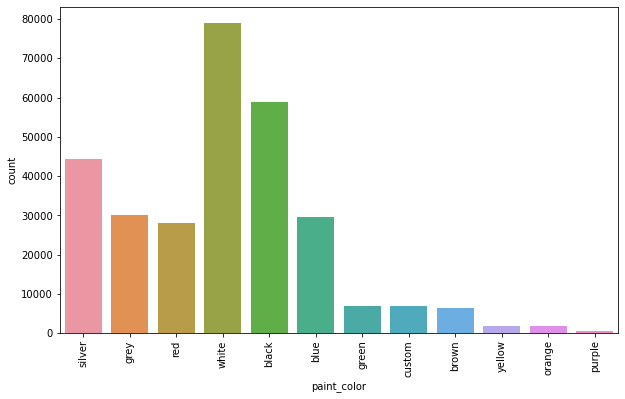

In [23]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.countplot(x='paint_color', data=data)

*White is the most preferred paint color.*

In [24]:
print('Top 10 paint colors preferred: ')
print(data['paint_color'].value_counts().iloc[:10])

Top 10 paint colors preferred: 
white     79077
black     58815
silver    44397
grey      30036
blue      29476
red       28126
green      7037
custom     6905
brown      6328
yellow     1793
Name: paint_color, dtype: int64


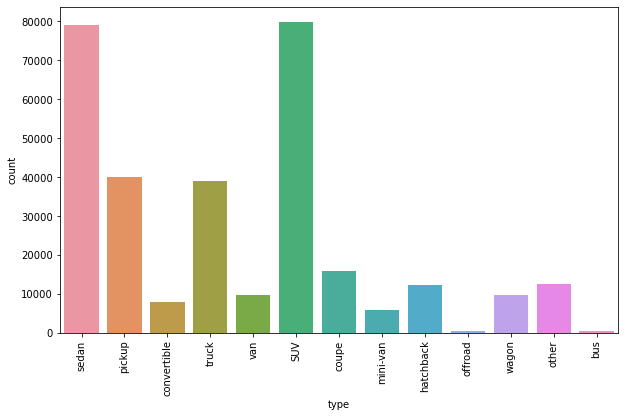

In [25]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.countplot(x='type', data=data)

In [26]:
print('Top 10 car types manufactured: ')
print(data['type'].value_counts().iloc[:10])

Top 10 car types manufactured: 
SUV            79759
sedan          79006
pickup         39997
truck          38995
coupe          15880
other          12541
hatchback      12361
van             9815
wagon           9790
convertible     7789
Name: type, dtype: int64


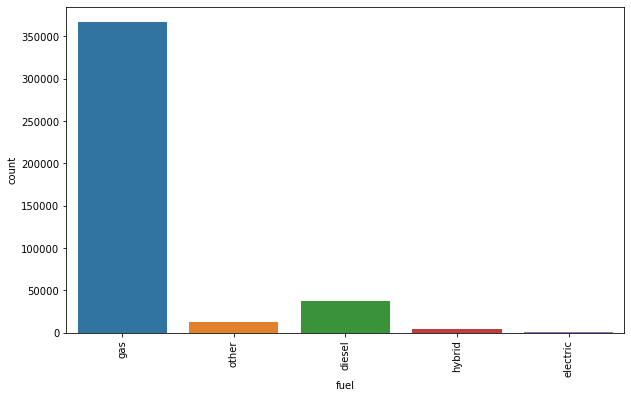

In [27]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.countplot(x='fuel', data=data)

*Almost 84% of cars uses gas as fuel.*

In [28]:
print('Top 5 car fuel types: ')
print(data['fuel'].value_counts().iloc[:5])

Top 5 car fuel types: 
gas         366813
diesel       37560
other        13181
hybrid        4264
electric      1019
Name: fuel, dtype: int64


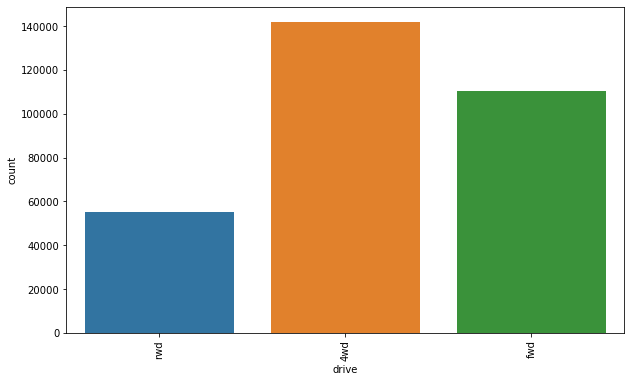

In [29]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.countplot(x='drive', data=data)

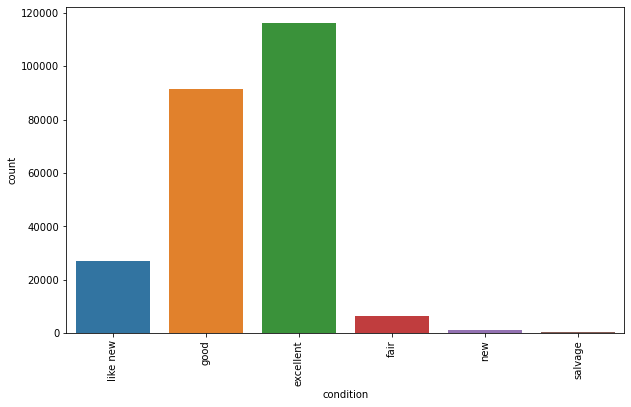

In [30]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.countplot(x='condition', data=data)

*Most of the cars are in either excellent or good condition.*

In [31]:
print('Top 5 car conditions: ')
print(data['condition'].value_counts().iloc[:5])

Top 5 car conditions: 
excellent    116332
good          91531
like new      27227
fair           6305
new            1298
Name: condition, dtype: int64


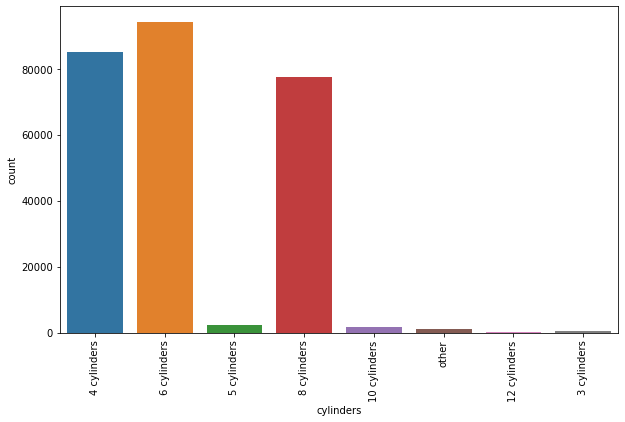

In [32]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.countplot(x='cylinders', data=data)

In [33]:
print('Top 5 car cylinders type: ')
print(data['cylinders'].value_counts().iloc[:5])

Top 5 car cylinders type: 
6 cylinders     94189
4 cylinders     85019
8 cylinders     77594
5 cylinders      2413
10 cylinders     1594
Name: cylinders, dtype: int64


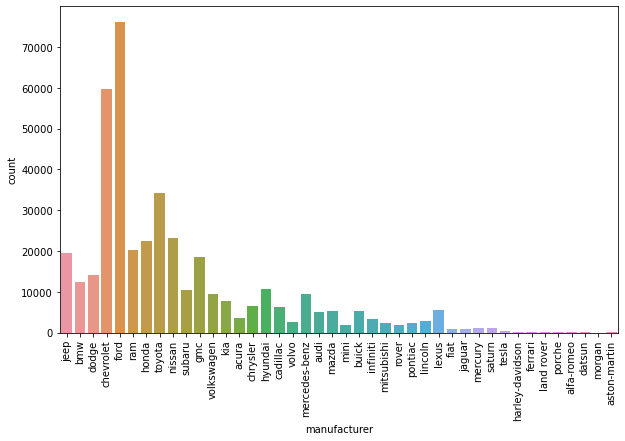

In [34]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.countplot(x='manufacturer', data=data)

*Ford is the largest manufacturer of cars followed by chevrolet and toyota.*

In [35]:
print('Top 5 car manufacturers: ')
print(data['manufacturer'].value_counts().iloc[:5])

Top 5 car manufacturers: 
ford         76167
chevrolet    59817
toyota       34250
nissan       23134
honda        22406
Name: manufacturer, dtype: int64


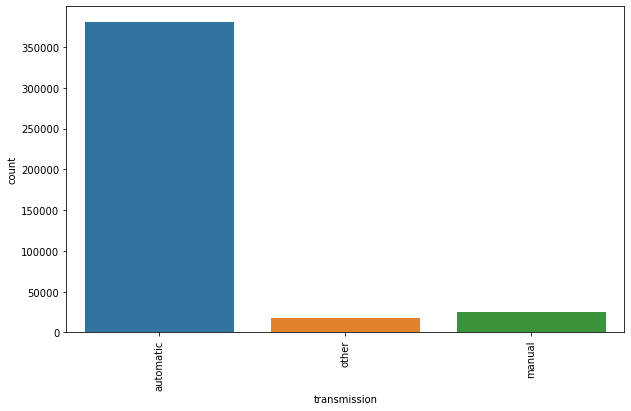

In [36]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.countplot(x='transmission', data=data)

*87% of used cars have automatic transmission system installed.*

In [37]:
print('Top 3 car transmission: ')
print(data['transmission'].value_counts().iloc[:3])

Top 3 car transmission: 
automatic    380867
manual        25390
other         17185
Name: transmission, dtype: int64
